#**Objetivo:** 

 


Objetivo:
En esta etapa se realizaran las transfomraciones del data set necesarias para realizar el EDA y busqueda de Insights.


Descripción del data Set 

La adquisición de datos corresponden a 5 campañas de encuestas promocionales.

Descripción:

* Year_Birth Año de Nacimiento
* Education Educación
* Marital_Status Estado Civil
* Income Ingresos
* Kidhome número de niños pequeños en casa del cliente.
* Teenhome número de adolescentes en casa del cliente
* Dt_Customer fecha en la que el cliente se registró al CRM de la compañía.
* Recency número de días que pasaron desde la última compra.
* MntWines cantidad gastada en vinos en los últimos dos años.
* MntFruits cantidad gastada en frutas en los últimos dos años.
* MntMeatProducts cantidad gastada en carne en los últimos dos años.
* MntFishProducts cantidad gastada en pescado en los últimos dos años.
* MntSweetProducts cantidad gastada en dulces en los últimos dos años.
* MntGoldProds cantidad gastada en productos de oro en los últimos dos años.
* NumDealsPurchases número de compras realizadas con descuentos.
* NumWebPurchases número de compras realizadas en el sitio web.
* NumCatalogPurchases numero de compras realizadas usando el catálogo.
* NumStorePurchases número de compras realizadas diractamente en tiendas
* NumWebVisitsMonth número de visitas realizadas al sitio web.
* AcceptedCmp3 1 si el cliente participó en la campaña 3 promocional.
* AcceptedCmp4 1 si el cliente participó en la campaña 4 promocional.
* AcceptedCmp5 1 si el cliente participó en la campaña 5 promocional.
* AcceptedCmp1 1 si el cliente participó en la campaña 1 promocional.
* AcceptedCmp2 1 si el cliente participó en la campaña 2 promocional.
Complain 1 si el cliente ha presentado alguna queja en los últimos dos años.
* Z_CostContact Costo Contacto
* Z_Revenue Ingresos
* Response

Transforamciones: 
* Trabajamos los null
* Nueva columna de monto total.
* Calculamos la edad
* Categorizamos la edad en Adulto mayor, adulto y joven.
* Eliminamos columnas con contantes
* Trabajamos los Outliers
* Nueva columna calculada con hijos totales





## Librerias:

In [1]:
#importamos las librerias necearias para esta etapa
import seaborn as sns
import pandas as pd
import missingno as msno
import numpy 
import matplotlib.pyplot       as plt
import matplotlib.pyplot       as plot


import numpy as np
%matplotlib inline
from google.colab import drive
import os
from datetime import date



In [2]:
!pip install sidetable

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#install library
!pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
#leer CSV dentro de un DataFrame
df=pd.read_csv('marketing_campaign.csv', sep=';')

In [5]:
#numero de filas y columnas 
df.shape

(2240, 29)

In [6]:
#informacion del data set, nulos y tipos de datos 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

3 columnas son categoricas y el resto int.

La coulmna Income tiene nulos

### Transformaciones: 

Hay 24 valores nulos los cuales se podrias eliminar las filas o reemplazarlas por la media.

In [7]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

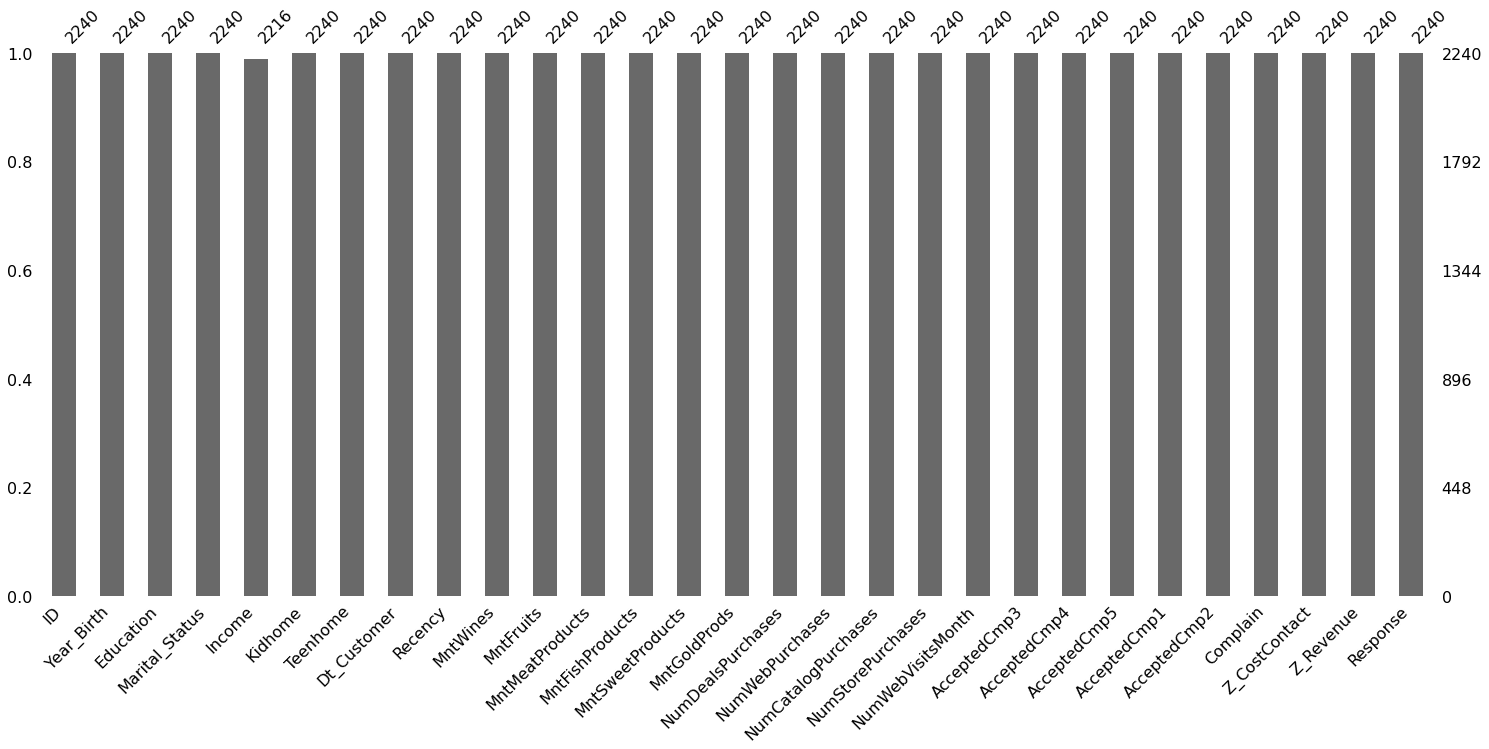

In [8]:
#Viasualizamos graficamente la columna con nulos. 
msno.bar(df);


<AxesSubplot:>

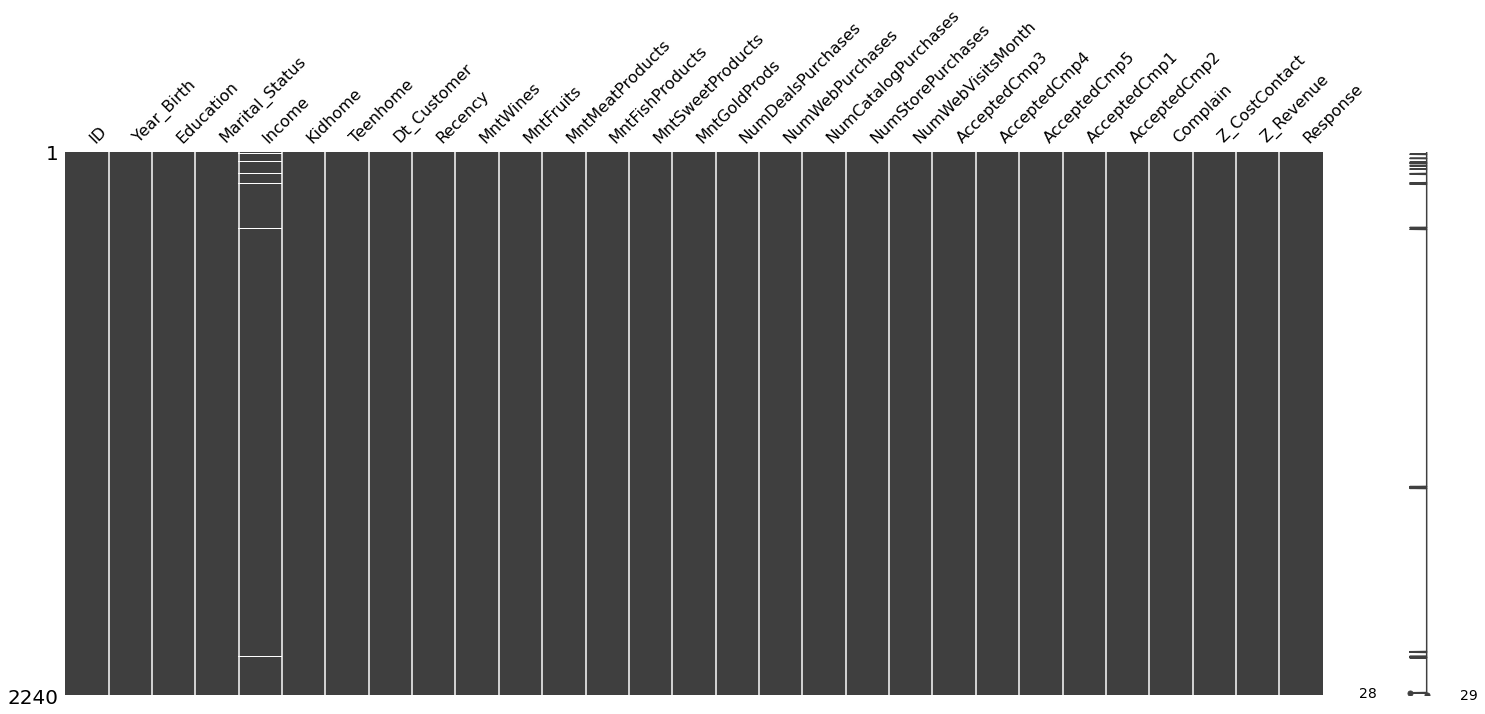

In [9]:
#Vemos en esta grafica donde esta los valores nulos. 
msno.matrix(df)

Como hay una solo columna con nulos no podemos visualizar si tiene correlacion con otra columna de nulos. 
msno.heatmap(df)

In [10]:
# Columnas con porcentaje de nulos
pd.set_option('display.max_rows', None)  # or 1000
serie=(df.isnull().sum()/df.shape[0])*100
serie=serie.sort_values(ascending=False)
serie= serie[serie>0]
serie

Income    1.071429
dtype: float64

In [11]:
#reemplazo los nulos por la media
df.fillna(df.Income.mean(),inplace=True)


In [12]:
#Sin nulos
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

(0.0, 2239.0)

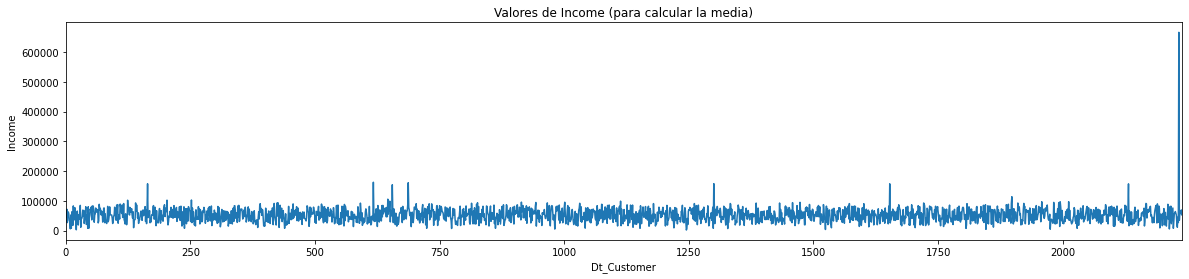

In [13]:
#Pruebamos valores outlier 
fig, ax = plt.subplots(figsize=(20, 4))
ax.plot(df.index, df.Income.values, label='Consulto los valores de Income para calcular la media')
ax.set_title('Valores de Income (para calcular la media)')
ax.set_xlabel('Dt_Customer')
ax.set_ylabel('Income')
ax.set_xlim(df.index[0], df.index[-1])
#ax.legend();

In [14]:
df = df[df.Income < 120000]
#dejo solo los menores de 120000

(0.0, 2239.0)

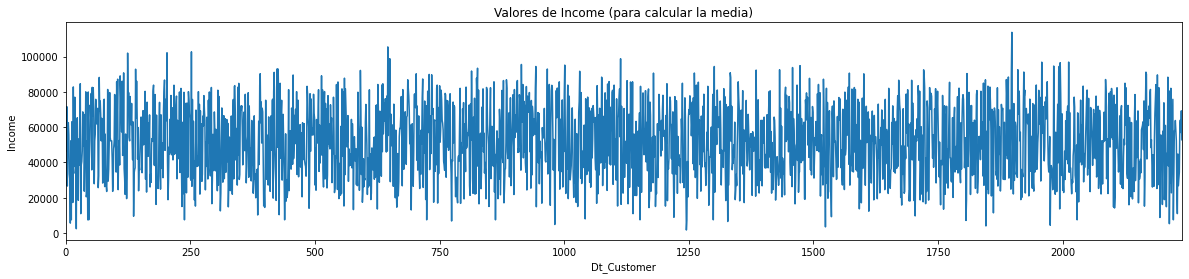

In [15]:
#compruebo que ya no tengo valores atipicos 
fig, ax = plt.subplots(figsize=(20, 4))
ax.plot(df.index, df.Income.values, label='Consulto los valores de Income para calcular la media')
ax.set_title('Valores de Income (para calcular la media)')
ax.set_xlabel('Dt_Customer')
ax.set_ylabel('Income')
ax.set_xlim(df.index[0], df.index[-1])
#ax.legend();

In [16]:
df= df.drop(['ID'], axis=1)
#eliminamos la columna id por que no es representativa para el analisis

(0.0, 2239.0)

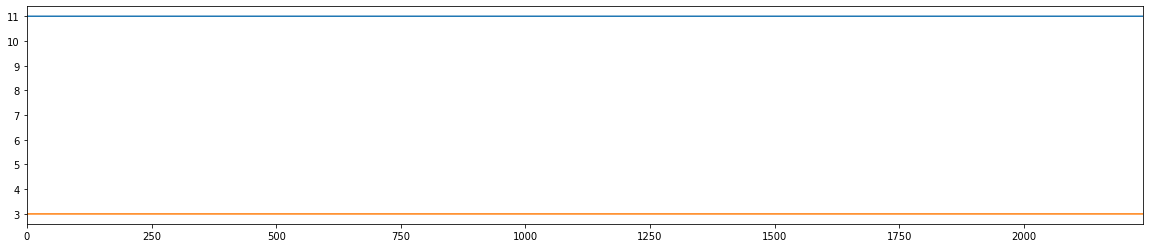

In [17]:
#Elimino las columnas Z_Revenue y Z_CostContact que son constantes 
fig, ax = plt.subplots(figsize=(20, 4))
ax.plot(df.index, df.Z_Revenue.values, label='Consulto los valores de Revenue')
ax.plot(df.index, df.Z_CostContact.values, label='Consulto los valores de Revenue')

ax.set_xlim(df.index[0], df.index[-1])
#ax.legend();

In [18]:
df= df.drop(['Z_Revenue'], axis=1)

In [19]:
df= df.drop(['Z_CostContact'], axis=1)

In [20]:
#Verificamos duplicados. Hay 26 filas, pero por su contenido es valido que se dupliquen.
print(df.shape)

(2232, 26)


In [21]:
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'], format='%d/%m/%Y')
#la columna Dt_Customer la transformo a tipo de datos fecha

Como tenemos el año de nacimiento vamos a calcular la edad para poder hacer análisis de esta variable.


In [22]:
today=date.today()
df['EDAD']=today.year - df['Year_Birth']

In [23]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,EDAD
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,4,7,0,0,0,0,0,0,1,66
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,2,5,0,0,0,0,0,0,0,69
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,10,4,0,0,0,0,0,0,0,58
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,4,6,0,0,0,0,0,0,0,39
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,6,5,0,0,0,0,0,0,0,42


In [24]:
#Los registros con años superiores a 100 los reemplazamos por el valor 100
df.loc[df['EDAD'] >=100, 'EDAD'] = 100

In [25]:
#Ceamos una nueva columna "Etapa" que nos indica se es Adulto mayor, Adulto, joven
conditionlist = [
    (df['EDAD'] >= 60) ,
    (df['EDAD'] > 40) & (df['EDAD'] <60),
    (df['EDAD'] <= 40)]
choicelist = ['Adulto mayor', 'Adulto', 'joven']
df['Etapa'] = np.select(conditionlist, choicelist, default='Not Specified')

In [26]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,EDAD,Etapa
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,7,0,0,0,0,0,0,1,66,Adulto mayor
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,5,0,0,0,0,0,0,0,69,Adulto mayor
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,4,0,0,0,0,0,0,0,58,Adulto
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,6,0,0,0,0,0,0,0,39,joven
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,5,0,0,0,0,0,0,0,42,Adulto


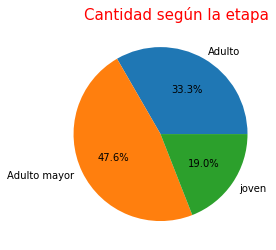

In [27]:
#Vemos, de la nueva columna,  la cantidad segun la etapa:
dfEtapa=df.groupby('Etapa').Complain.sum()
plt.pie(dfEtapa,labels=dfEtapa.index, autopct="%.1f%%")
plt.title('Cantidad según la etapa',loc="right",color="r",fontsize=15)
plt.show()

In [28]:
#Vemos los valores en la columna Educación:
import sidetable
df.stb.freq(['Education'])

,Education,count,percent,cumulative_count,cumulative_percent
0,Graduation,1124,50.358423,1124,50.358423
1,PhD,482,21.594982,1606,71.953405
2,Master,369,16.532258,1975,88.485663
3,2n Cycle,203,9.094982,2178,97.580645
4,Basic,54,2.419355,2232,100.000000


Son muy pocos registros con el nivel Basic

In [29]:
#Vemos los valores en la columna Estado civil:
import sidetable
df.stb.freq(['Marital_Status'])

,Marital_Status,count,percent,cumulative_count,cumulative_percent
0,Married,861,38.575269,861,38.575269
1,Together,576,25.806452,1437,64.381720
2,Single,480,21.505376,1917,85.887097
3,Divorced,231,10.349462,2148,96.236559
4,Widow,77,3.449821,2225,99.686380
5,Alone,3,0.134409,2228,99.820789
6,YOLO,2,0.089606,2230,99.910394
7,Absurd,2,0.089606,2232,100.000000


Los ultimos tres tipos Alone , YOLO y Absurd. Parecen ser datos basura o desnormalizado.

In [30]:
#Reemplazo 'Alone' por 'Single' y elimino YOLO y Absurd	
df.loc[df['Marital_Status']=='Alone', 'Marital_Status'] ='Single'

In [31]:
df.drop(df[(df['Marital_Status'] =='YOLO')].index, inplace=True)
df.drop(df[(df['Marital_Status'] =='Absurd')].index, inplace=True)

In [32]:
#sumamos todos los tipos de gastos en una unica variable para posteriores analisis.
df['Mnt_total'] = df['MntWines'] + df['MntFruits'] +df['MntMeatProducts'] +df['MntFishProducts'] +df['MntSweetProducts'] +df['MntGoldProds']

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


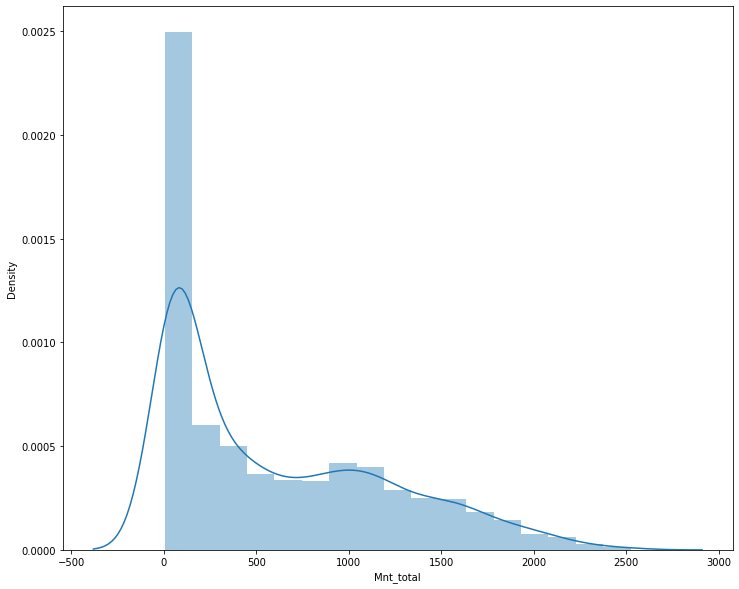

In [33]:
fig, axes = plt.subplots(figsize=(12,10))
sns.distplot(df['Mnt_total']);

La mayoria no gasta o esta muy cerca de 0.

In [34]:
#sumanos la cantidad de hijos entre niños y adolescentes
df['Hijos_totales'] = df['Kidhome'] + df['Kidhome'] 

In [35]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,EDAD,Etapa,Mnt_total,Hijos_totales
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,0,0,1,66,Adulto mayor,1617,0
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,0,0,0,69,Adulto mayor,27,2
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,0,58,Adulto,776,0
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,0,0,0,39,joven,53,2
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,0,0,42,Adulto,422,2


In [36]:
#vemos como quedo nuestro set de datos limpio
df.describe(include='all').T

<ipython-input-36-a781a099da12>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
Year_Birth,2228.0,NaN,NaN,NaN,NaT,NaT,1968.783214,11.986864,1893.0,1959.0,1970.0,1977.0,1996.0
Education,2228,5,Graduation,1123,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,2228,5,Married,861,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,2228.0,NaN,NaN,NaN,NaT,NaT,51624.511684,20609.636927,1730.0,35409.0,51566.0,68118.0,113734.0
Kidhome,2228.0,NaN,NaN,NaN,NaT,NaT,0.445242,0.538721,0.0,0.0,0.0,1.0,2.0
Teenhome,2228.0,NaN,NaN,NaN,NaT,NaT,0.507181,0.544757,0.0,0.0,0.0,1.0,2.0
Dt_Customer,2228,663,2012-08-31 00:00:00,12,2012-07-30,2014-06-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Recency,2228.0,NaN,NaN,NaN,NaT,NaT,49.149013,28.945271,0.0,24.0,49.5,74.0,99.0
MntWines,2228.0,NaN,NaN,NaN,NaT,NaT,304.86939,337.065699,0.0,24.0,174.5,505.0,1493.0
MntFruits,2228.0,NaN,NaN,NaN,NaT,NaT,26.349192,39.809573,0.0,1.75,8.0,33.0,199.0


In [37]:
from pandas.api.types import is_numeric_dtype

def univariado_info(df):
  '''Calculo de informacion estadistias y genericas de cada columna de un dataframe'''

  #create a dataframe with especificas columnas

  df_info = pd.DataFrame(columns=['Cantidad', 'Tipo' , 'Missing', 'Unicos', 'Numeric'])
  #loop de todas las variables del dataframe
  for col in df:

      #obtengo info de la columna
      data_series = df[col]
      #lleno dataframe con las columnas iniciales
      df_info.loc[col] = [data_series.count(), data_series.dtype, data_series.isnull().sum(), data_series.nunique(), is_numeric_dtype(data_series)]

  #calculo el describe 
  df_describe = df.describe(include='all').T[['top', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]
  #calculo sesgo y curtosis
  df_stats = pd.DataFrame([df.skew(), df.kurtosis()], index=['sesgo', 'kurt']).T

  return pd.concat([df_info,pd.concat([df_describe, df_stats], axis=1)], axis=1).fillna('-')


df_uni_stats = univariado_info(df)
df_uni_stats

<ipython-input-37-a25750984966>:18: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_describe = df.describe(include='all').T[['top', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]
<ipython-input-37-a25750984966>:20: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_stats = pd.DataFrame([df.skew(), df.kurtosis()], index=['sesgo', 'kurt']).T


,Cantidad,Tipo,Missing,Unicos,Numeric,top,mean,std,min,25%,50%,75%,max,sesgo,kurt
Year_Birth,2228,int64,0,59,True,-,1968.783214,11.986864,1893.0,1959.0,1970.0,1977.0,1996.0,-0.348272,0.719189
Education,2228,object,0,5,False,Graduation,-,-,-,-,-,-,-,-,-
Marital_Status,2228,object,0,5,False,Married,-,-,-,-,-,-,-,-,-
Income,2228,float64,0,1966,True,-,51624.511684,20609.636927,1730.0,35409.0,51566.0,68118.0,113734.0,0.013186,-0.825515
Kidhome,2228,int64,0,3,True,-,0.445242,0.538721,0.0,0.0,0.0,1.0,2.0,0.632525,-0.781362
Teenhome,2228,int64,0,3,True,-,0.507181,0.544757,0.0,0.0,0.0,1.0,2.0,0.405231,-0.985308
Dt_Customer,2228,datetime64[ns],0,663,False,2012-08-31 00:00:00,-,-,-,-,-,-,-,-,-
Recency,2228,int64,0,100,True,-,49.149013,28.945271,0.0,24.0,49.5,74.0,99.0,-0.004359,-1.20093
MntWines,2228,int64,0,776,True,-,304.86939,337.065699,0.0,24.0,174.5,505.0,1493.0,1.17089,0.583274
MntFruits,2228,int64,0,158,True,-,26.349192,39.809573,0.0,1.75,8.0,33.0,199.0,2.101432,4.046477


Podemos ver desde esta información:

Income: esta muy distribuido.

Hijos_totales: en esta muestra, solo poseen una cantidad de: 0, 2 0 4 hijos. por que hay tres valores distintos, el max en 4 y el min es 0

Los Gastos tambien estan distribuidos con muchos valores distintos.

Las Purchases (compras) poseen valores continuos

Son Variables categoricas: Etapa, Education, Marital_Status

In [38]:
df.to_csv('marketing_campaignLIMPIO.csv')

##¡¡Ya esta limpio como para comenzar EDA!!